In [32]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [33]:
df_confirmed_cases=pd.read_csv('../data/raw_data/confirmed_cases.csv')
df_death=pd.read_csv('../data/raw_data/confirmed_deaths.csv')
df_school_closing=pd.read_csv('../data/raw_data/c1m_school_closing.csv')
df_workplace_closing=pd.read_csv('../data/raw_data/c2m_workplace_closing.csv')
df_cancel_public_event=pd.read_csv('../data/raw_data/c3m_cancel_public_events.csv')
df_restriction_on_gathering=pd.read_csv('../data/raw_data/c4m_restrictions_on_gatherings.csv')
df_stay_at_home=pd.read_csv('../data/raw_data/c6m_stay_at_home_requirements.csv')
df_international_travel=pd.read_csv('../data/raw_data/c6m_stay_at_home_requirements.csv')
df_goverment_response=pd.read_csv('../data/raw_data/government_response_index_avg.csv')
df_facial_covering=pd.read_csv('../data/raw_data/h6m_facial_coverings.csv')
df_vacination_policy=pd.read_csv('../data/raw_data/h7_vaccination_policy.csv')


FileNotFoundError: [Errno 2] No such file or directory: '../raw_data/confirmed_cases.csv'

In [ ]:
df_school_closing.head()

,Unnamed: 0,country_code,country_name,region_code,region_name,jurisdiction,01Jan2020,02Jan2020,03Jan2020,04Jan2020,...,29Aug2022,30Aug2022,31Aug2022,01Sep2022,02Sep2022,03Sep2022,04Sep2022,05Sep2022,06Sep2022,07Sep2022
0,1,ABW,Aruba,NaN,NaN,NAT_TOTAL,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2,AFG,Afghanistan,NaN,NaN,NAT_TOTAL,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,AGO,Angola,NaN,NaN,NAT_TOTAL,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,4,ALB,Albania,NaN,NaN,NAT_TOTAL,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,AND,Andorra,NaN,NaN,NAT_TOTAL,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def data_cleaning_all_countries(name_data_table):
    trans_table=name_data_table.groupby('country_code').agg('sum').T.drop('Unnamed: 0')
    trans_table.index = pd.to_datetime( trans_table.index).fillna(0)
    return trans_table
    
data_cleaning_all_countries(df_school_closing)
    

country_code,ABW,AFG,AGO,ALB,AND,ARE,ARG,AUS,AUT,AZE,...,USA,UZB,VEN,VIR,VNM,VUT,YEM,ZAF,ZMB,ZWE
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_confirmed_cases_USA=data_cleaning_all_countries(df_confirmed_cases)['USA']
data_school_closing_USA=data_cleaning_all_countries(df_school_closing)['USA']
df_death_USA=data_cleaning_all_countries(df_death)['USA']
#df_vacination_policy
#df_goverment_response
#df_cancel_public_event
data_confirmed_cases_USA.tail()


2022-09-03    188451479.0
2022-09-04    188462003.0
2022-09-05    188500547.0
2022-09-06    103684406.0
2022-09-07    103684406.0
Name: USA, dtype: float64

In [ ]:
data_school_closing_USA.tail()

2022-09-03    0.0
2022-09-04    0.0
2022-09-05    0.0
2022-09-06    0.0
2022-09-07    0.0
Name: USA, dtype: float64

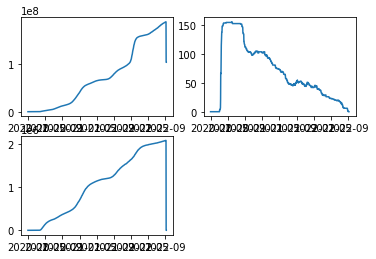

In [ ]:
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.plot(data_confirmed_cases_USA,label='confirmed cases')

plt.subplot(2,2,2)
plt.plot(data_school_closing_USA ,label='school_closing')

plt.subplot(2, 2, 3)
plt.plot(df_death_USA,label='death_rate')


plt.show()

In [ ]:
data_confirmed_cases_USA.tail()

2022-09-03    188451479.0
2022-09-04    188462003.0
2022-09-05    188500547.0
2022-09-06    103684406.0
2022-09-07    103684406.0
Name: USA, dtype: float64

In [ ]:
data_confirmed_cases_USA_days = pd.concat([data_confirmed_cases_USA,data_confirmed_cases_USA.shift(periods=2)], axis=1)

In [ ]:
data_confirmed_cases_USA_days = pd.concat([data_confirmed_cases_USA_days,data_confirmed_cases_USA.shift(periods=3)], axis=1)

In [ ]:
data_confirmed_cases_USA_days=pd.concat([data_confirmed_cases_USA_days,data_confirmed_cases_USA.shift(periods=4)], axis=1)

In [ ]:
data_confirmed_cases_USA_days=pd.concat([data_confirmed_cases_USA_days,data_confirmed_cases_USA.shift(periods=5)], axis=1)

In [ ]:
data_confirmed_cases_USA_days=pd.concat([data_confirmed_cases_USA_days,data_confirmed_cases_USA.shift(periods=6)], axis=1)

In [ ]:
data_confirmed_cases_USA_days=pd.concat([data_confirmed_cases_USA_days,data_confirmed_cases_USA.shift(periods=7)], axis=1)

In [ ]:
data_confirmed_cases_USA_days=pd.concat([data_confirmed_cases_USA_days,data_confirmed_cases_USA.shift(periods=8)], axis=1)

In [ ]:
data_confirmed_cases_USA_days=pd.concat([data_confirmed_cases_USA_days,data_confirmed_cases_USA.shift(periods=9)], axis=1)

In [ ]:
data_confirmed_cases_USA_days=pd.concat([data_confirmed_cases_USA_days,data_confirmed_cases_USA.shift(periods=10)], axis=1)

In [ ]:
data_confirmed_cases_USA_days.columns = ['confirmed_case','day-2','day-3','day-4','day-5','day-6','day-7','day-8','day-9','day-10']

In [ ]:
data_confirmed_cases_USA_days.tail(10)

,confirmed_case,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
2022-08-29,187590614.0,187376344.0,187355949.0,187117337.0,186843080.0,186543487.0,186347473.0,186092600.0,186076465.0,186056518.0
2022-08-30,187732965.0,187387981.0,187376344.0,187355949.0,187117337.0,186843080.0,186543487.0,186347473.0,186092600.0,186076465.0
2022-08-31,188038152.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0,186843080.0,186543487.0,186347473.0,186092600.0
2022-09-01,188271143.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0,186843080.0,186543487.0,186347473.0
2022-09-02,188434370.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0,186843080.0,186543487.0
2022-09-03,188451479.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0,186843080.0
2022-09-04,188462003.0,188434370.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0
2022-09-05,188500547.0,188451479.0,188434370.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0
2022-09-06,103684406.0,188462003.0,188451479.0,188434370.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0
2022-09-07,103684406.0,188500547.0,188462003.0,188451479.0,188434370.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0


In [ ]:
data_confirmed_cases_USA_days.head(20)

,confirmed_case,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
2020-01-01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
country = 'USA'

# INDEX FEATURES
data_usa=data_confirmed_cases_USA_days
#data_USA = pd.concat([data_confirmed_cases_USA_days,data_cleaning_all_countries(df_school_closing)[country]])
#country_features.index.name = country
#data_USA.columns = ['school_closing']
data_usa.insert(0, 'school_closing', data_cleaning_all_countries(df_school_closing)[country])


#country_features['Containment_and_health'] = df_health[[country]]
#country_features['Stringency'] = df_strigency[[country]]
#country_features['Economics_sup'] = df_economic[[country]]



In [ ]:
data_usa.insert(1, 'goverment_response', data_cleaning_all_countries(df_goverment_response)[country])

In [ ]:
data_usa

,school_closing,goverment_response,confirmed_case,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
2020-01-01,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.0,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,0.0,0.00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,0.0,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-03,0.0,2146.68,188451479.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0,186843080.0
2022-09-04,0.0,2146.68,188462003.0,188434370.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0
2022-09-05,0.0,2146.68,188500547.0,188451479.0,188434370.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0
2022-09-06,0.0,2146.68,103684406.0,188462003.0,188451479.0,188434370.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0


In [ ]:
data_usa.insert(2, 'cancel_public_event', data_cleaning_all_countries(df_cancel_public_event)[country])

In [ ]:
data_usa.insert(3,'workplace_closing', data_cleaning_all_countries(df_workplace_closing)[country])

In [ ]:
data_usa.insert(4,'stay_at_home', data_cleaning_all_countries(df_stay_at_home)[country])
data_usa.insert(5,'international_travel', data_cleaning_all_countries(df_international_travel)[country])
data_usa.insert(6,'facial_covering', data_cleaning_all_countries(df_facial_covering)[country])

In [ ]:
data_usa


,school_closing,goverment_response,cancel_public_event,workplace_closing,stay_at_home,international_travel,facial_covering,confirmed_case,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
2020-01-01,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-03,0.0,2146.68,0.0,1.0,1.0,1.0,0.0,188451479.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0,186843080.0
2022-09-04,0.0,2146.68,0.0,1.0,1.0,1.0,0.0,188462003.0,188434370.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0
2022-09-05,0.0,2146.68,0.0,1.0,1.0,1.0,0.0,188500547.0,188451479.0,188434370.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0
2022-09-06,0.0,2146.68,0.0,1.0,1.0,1.0,0.0,103684406.0,188462003.0,188451479.0,188434370.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0


In [ ]:
X=data_usa.drop(columns=['confirmed_case','day-2','day-3','day-4','day-5','day-6','day-7','day-8','day-9','day-10'])

In [ ]:
y=data_usa['confirmed_case']

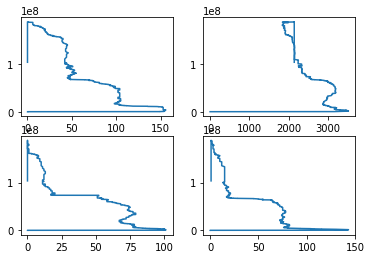

In [ ]:
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.plot(X['school_closing'],y,label='cases as per school closure')

plt.subplot(2, 2, 2)
plt.plot(X['goverment_response'],y,label='cases as per government response')

plt.subplot(2, 2, 3)
plt.plot(X['cancel_public_event'],y,label='cases as per canceling public events')

plt.subplot(2, 2, 4)
plt.plot(X['workplace_closing'],y,label='cases as per workplace_closing')



plt.show()

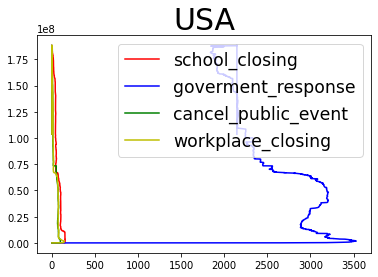

In [ ]:
#x = range(country_features.shape[0])
#img = plt.figure(figsize=(25,10))
plt.plot(X['school_closing'],y, color = 'r')
plt.plot(X['goverment_response'],y, color = 'b')
plt.plot(X['cancel_public_event'],y, color = 'g')
plt.plot(X['workplace_closing'],y, color = 'y')
plt.title(country, fontsize=30)
plt.legend(['school_closing','goverment_response','cancel_public_event','workplace_closing'], fontsize='xx-large')